In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


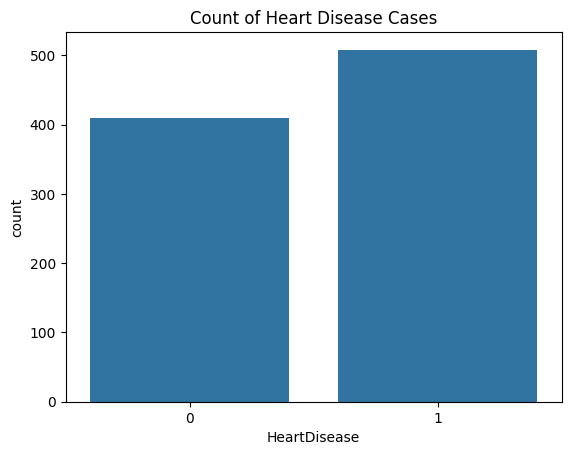

In [7]:
sns.countplot(x='HeartDisease', data=dataset)
plt.title('Count of Heart Disease Cases')
plt.show()

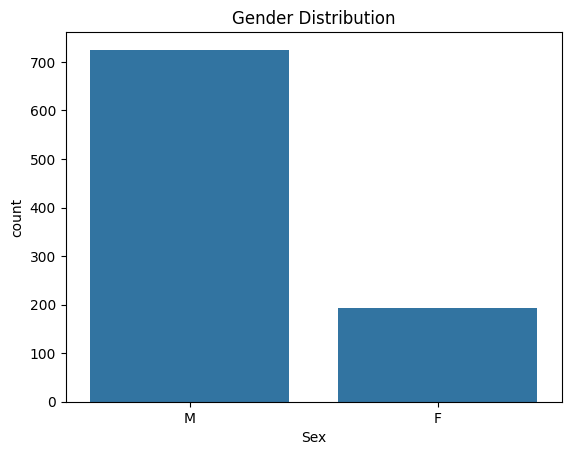

In [8]:
sns.countplot(x='Sex', data=dataset)
plt.title('Gender Distribution')
plt.show()

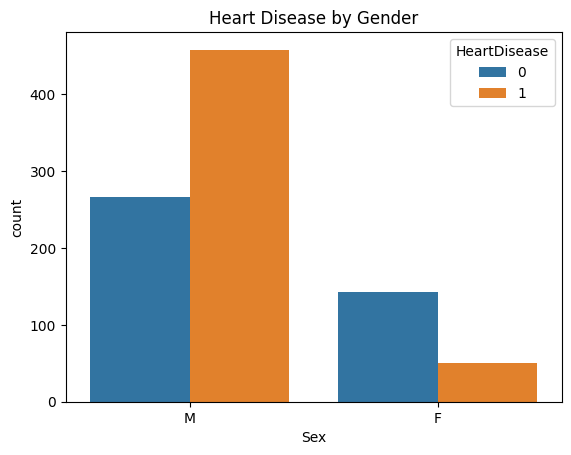

In [9]:
sns.countplot(x='Sex', hue='HeartDisease', data=dataset)
plt.title('Heart Disease by Gender')
plt.show()

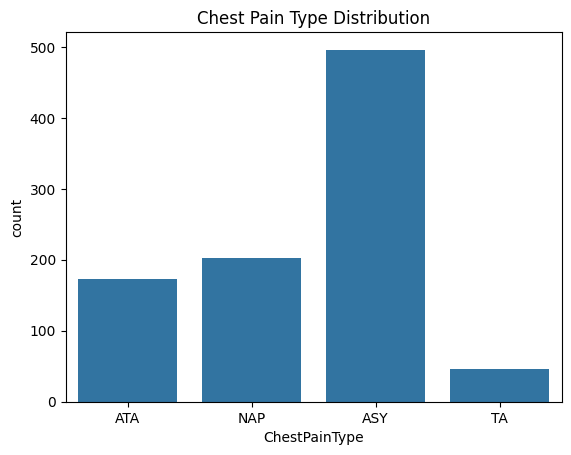

In [10]:
sns.countplot(x='ChestPainType', data=dataset)
plt.title('Chest Pain Type Distribution')
plt.show()

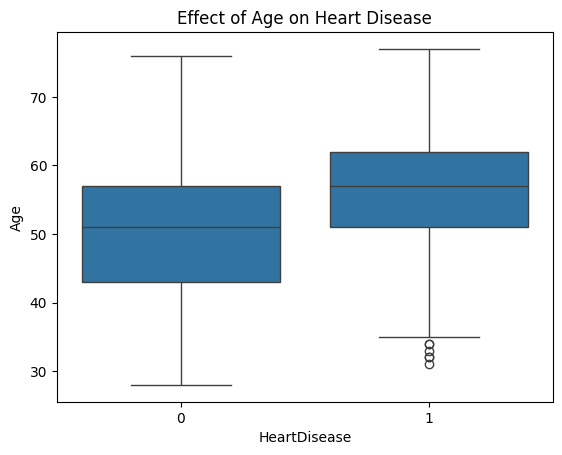

In [11]:
sns.boxplot(x='HeartDisease', y='Age', data=dataset)
plt.title('Effect of Age on Heart Disease')
plt.show()

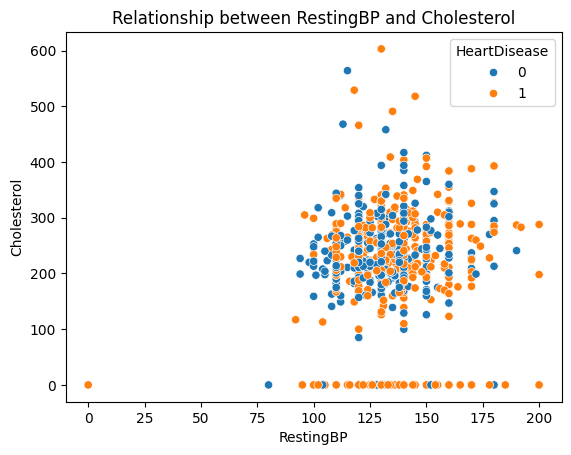

In [12]:
sns.scatterplot(x='RestingBP', y='Cholesterol', hue='HeartDisease', data=dataset)
plt.title('Relationship between RestingBP and Cholesterol')
plt.show()

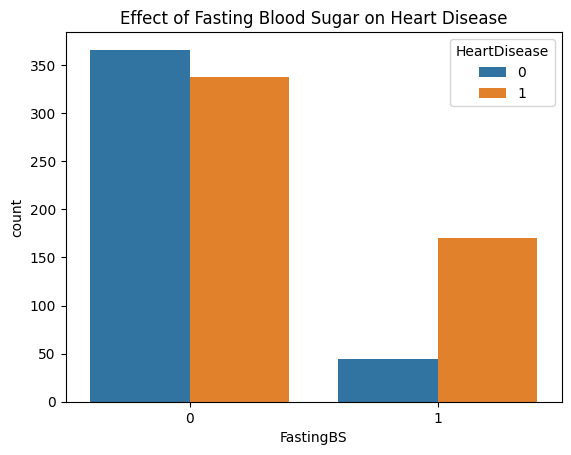

In [13]:
sns.countplot(x= 'FastingBS', hue='HeartDisease', data=dataset)
plt.title('Effect of Fasting Blood Sugar on Heart Disease')
plt.show()

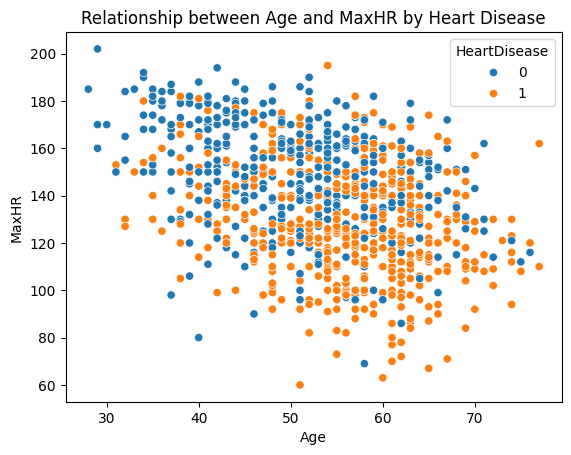

In [14]:
sns.scatterplot(x='Age', y = 'MaxHR', hue='HeartDisease', data=dataset)
plt.title('Relationship between Age and MaxHR by Heart Disease')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
ohe = OneHotEncoder(drop="first")

In [17]:
ohe.fit(dataset[["Sex"]])

OneHotEncoder(drop='first')

In [18]:
dataset[["Sex"]] = pd.DataFrame(ohe.transform(dataset[["Sex"]]).toarray())

In [19]:
dataset["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [20]:
dataset["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [21]:
dataset["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [22]:
dataset["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [23]:
ohe1 = OneHotEncoder(drop="first")

In [24]:
ohe1.fit(dataset[["ExerciseAngina"]])

OneHotEncoder(drop='first')

In [25]:
dataset[["ExerciseAngina"]] = pd.DataFrame(ohe1.transform(dataset[["ExerciseAngina"]]).toarray())

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
oe = OrdinalEncoder(categories=[['Normal', 'ST', 'LVH']])

In [28]:
oe.fit(dataset[["RestingECG"]])

OrdinalEncoder(categories=[['Normal', 'ST', 'LVH']])

In [29]:
dataset[["RestingECG"]] = pd.DataFrame(oe.transform(dataset[["RestingECG"]]))

In [30]:
dataset["RestingECG"]

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
913    0.0
914    0.0
915    0.0
916    2.0
917    0.0
Name: RestingECG, Length: 918, dtype: float64

In [31]:
oe1 = OrdinalEncoder(categories=[['ATA', 'NAP', 'ASY', 'TA']])

In [32]:
oe1.fit(dataset[["ChestPainType"]])

OrdinalEncoder(categories=[['ATA', 'NAP', 'ASY', 'TA']])

In [33]:
dataset["ChestPainType"] = pd.DataFrame(oe1.transform(dataset[["ChestPainType"]]))

In [34]:
dataset["ChestPainType"]

0      0.0
1      1.0
2      0.0
3      2.0
4      1.0
      ... 
913    3.0
914    2.0
915    2.0
916    0.0
917    1.0
Name: ChestPainType, Length: 918, dtype: float64

In [35]:
oe2 = OrdinalEncoder(categories=[['Up', 'Flat', 'Down']])

In [36]:
oe2.fit(dataset[["ST_Slope"]])

OrdinalEncoder(categories=[['Up', 'Flat', 'Down']])

In [37]:
dataset["ST_Slope"] = pd.DataFrame(oe2.transform(dataset[["ST_Slope"]]))

In [38]:
dataset["ST_Slope"]

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: ST_Slope, Length: 918, dtype: float64

In [39]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,0.0,140,289,0,0.0,172,0.0,0.0,0.0,0
1,49,0.0,1.0,160,180,0,0.0,156,0.0,1.0,1.0,1
2,37,1.0,0.0,130,283,0,1.0,98,0.0,0.0,0.0,0
3,48,0.0,2.0,138,214,0,0.0,108,1.0,1.5,1.0,1
4,54,1.0,1.0,150,195,0,0.0,122,0.0,0.0,0.0,0


In [40]:
x = dataset.iloc[:, :-1]
y = dataset["HeartDisease"]

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
ss = StandardScaler()

In [43]:
ss.fit(x)

StandardScaler()

In [44]:
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [45]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,-1.705573,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.052114
1,-0.478484,-1.938163,-0.530992,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.596078
2,-1.751359,0.515952,-1.705573,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.052114
3,-0.584556,-1.938163,0.643588,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.596078
4,0.051881,0.515952,-0.530992,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,1.818169,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,0.596078
914,1.536902,0.515952,0.643588,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,0.596078
915,0.370100,0.515952,0.643588,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,0.596078
916,0.370100,-1.938163,-1.705573,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,0.596078


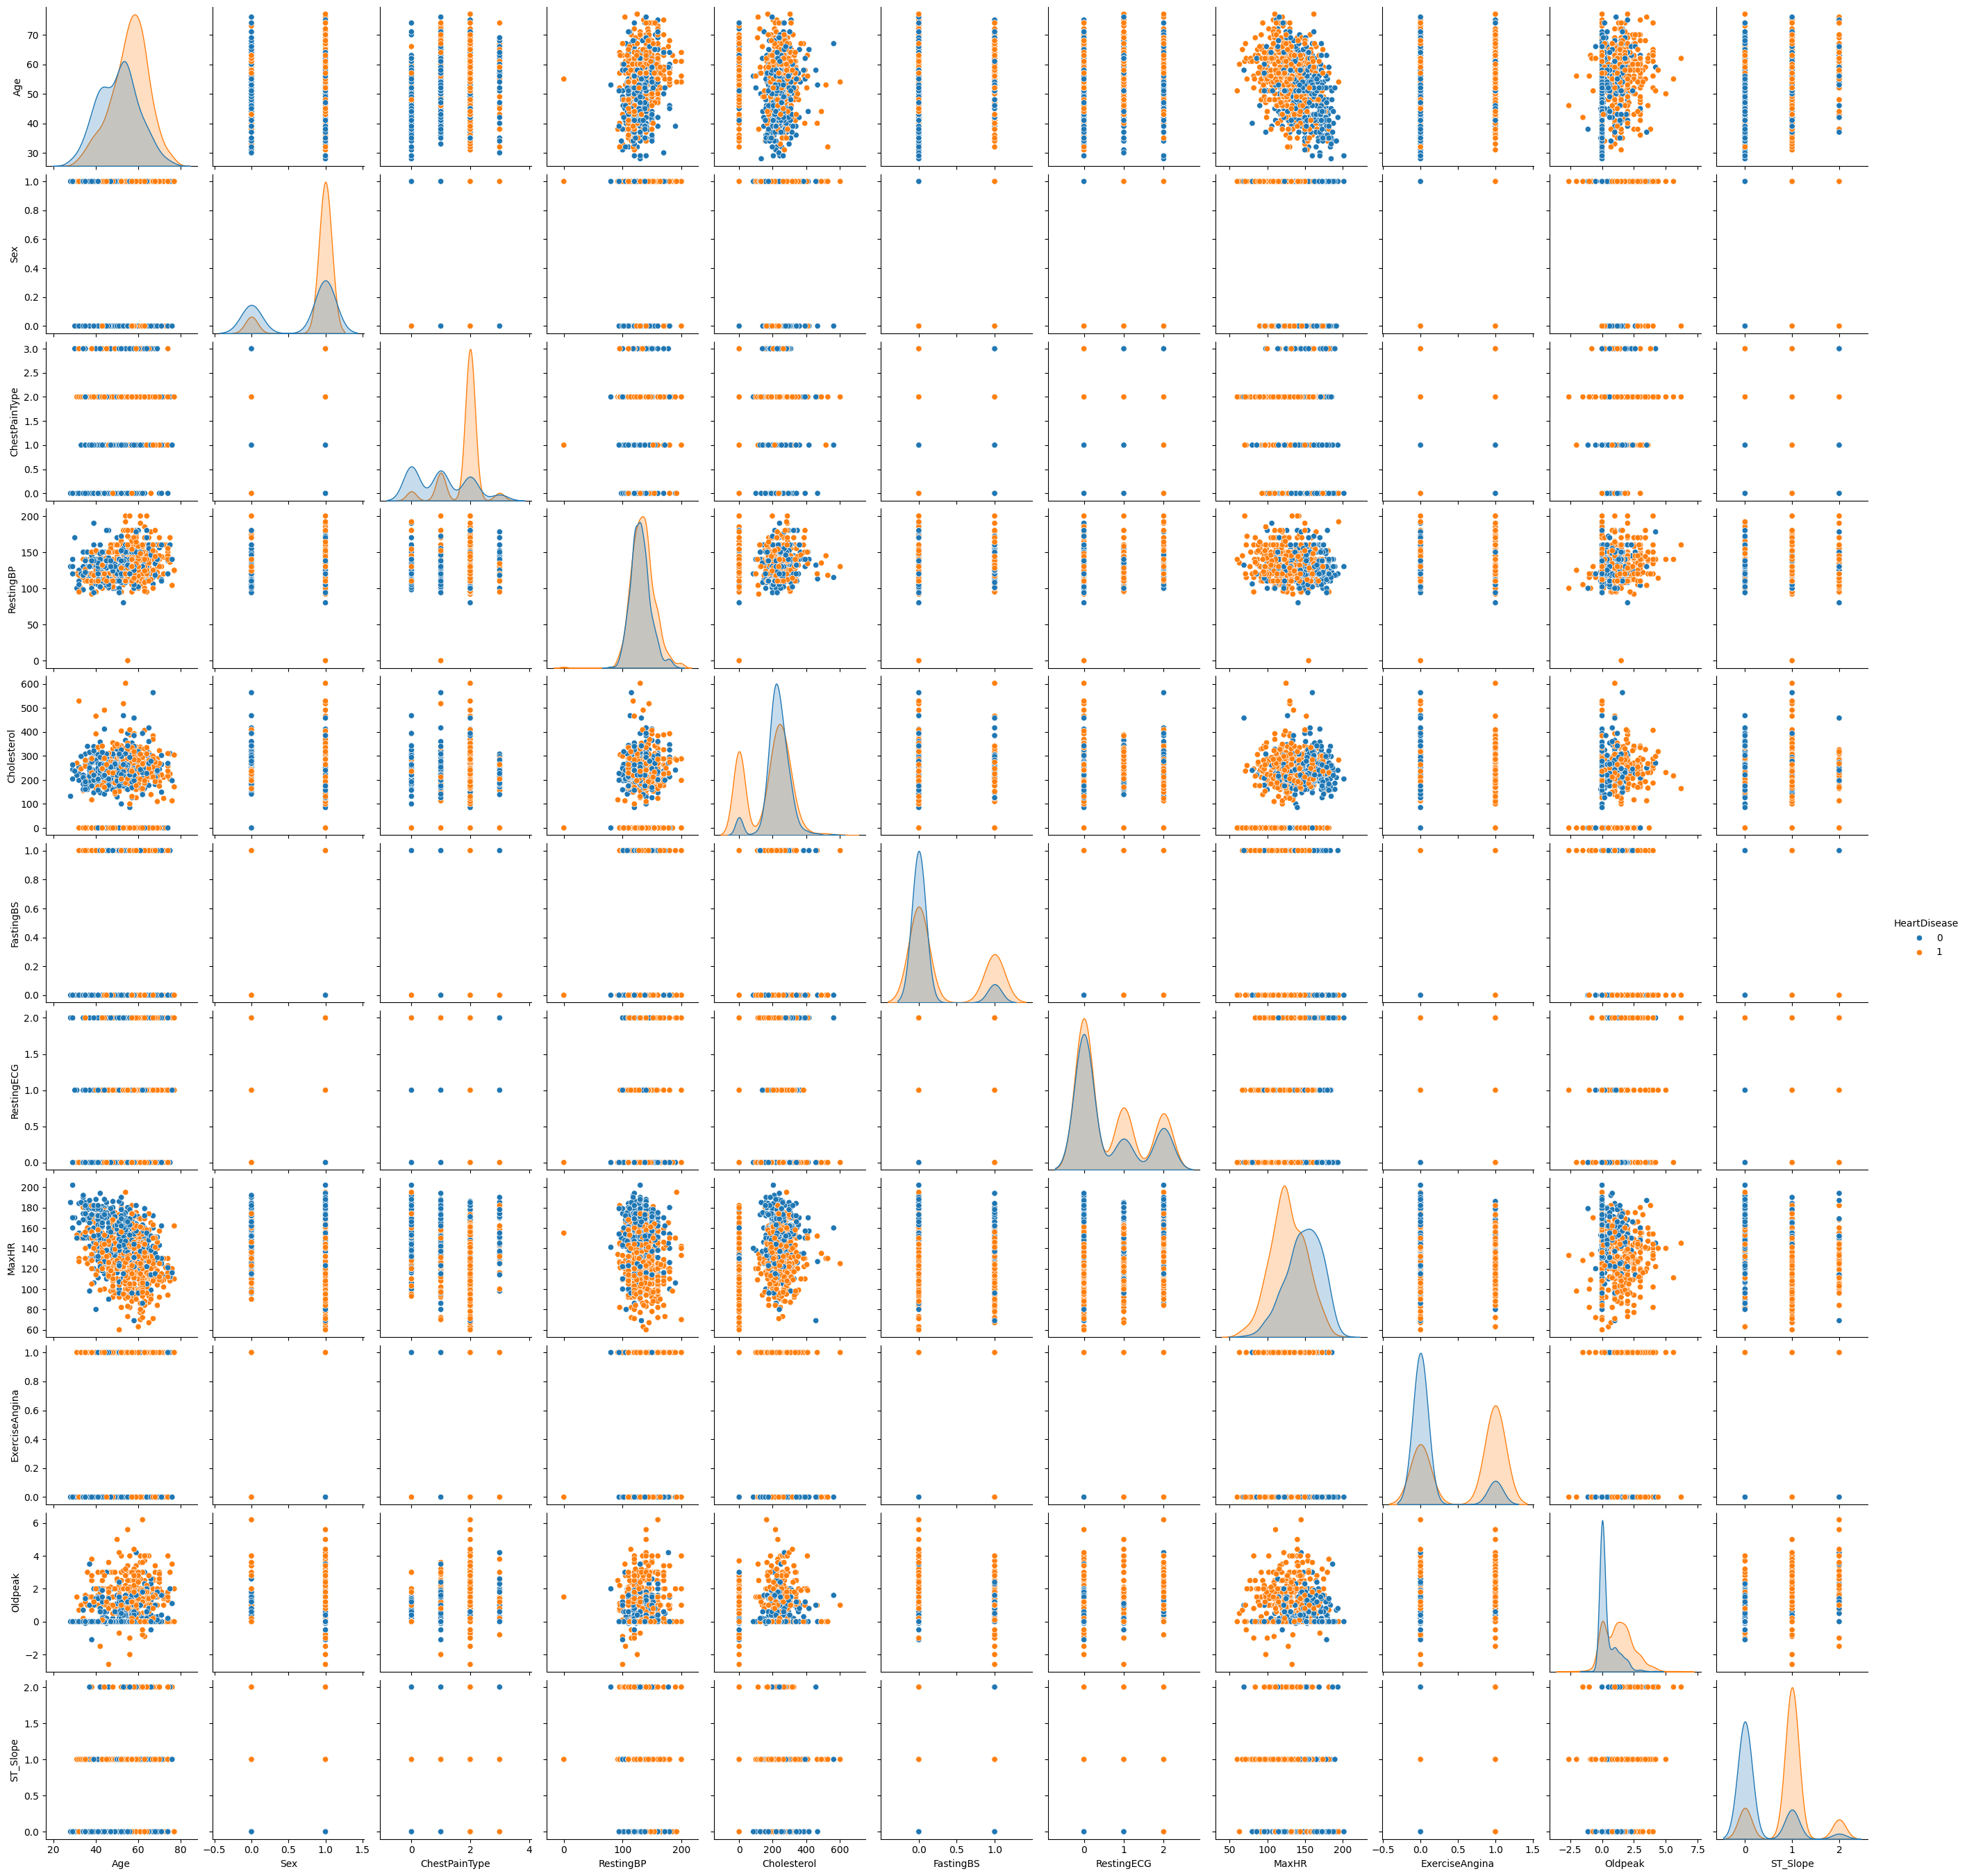

In [46]:
sns.pairplot(data=dataset, hue="HeartDisease")
plt.show()

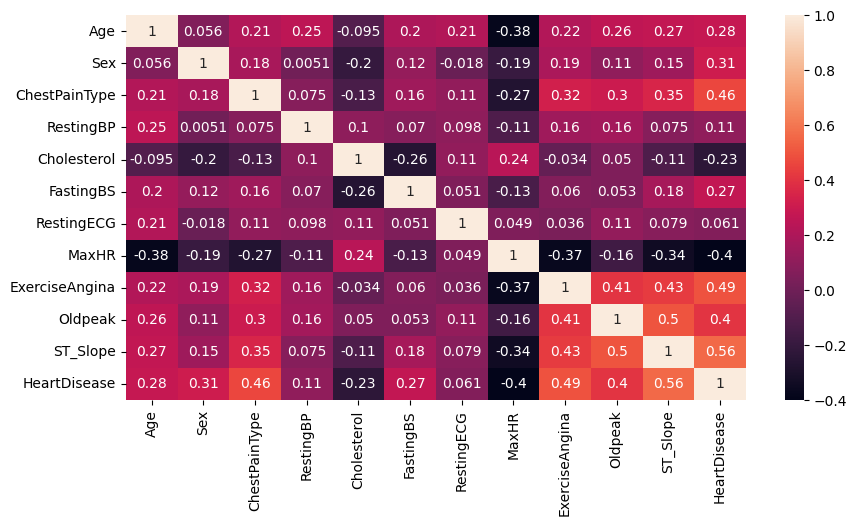

In [47]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(x_train, y_train)

LogisticRegression()

In [53]:
lr.score(x_test, y_test)*100

83.69565217391305

In [54]:
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.model_selection import LeaveOneOut, LeavePOut, KFold, StratifiedKFold

In [57]:
l1 = cross_val_score(lr, x, y, cv=KFold(n_splits=10))

In [58]:
l1.mean()*100

83.21428571428571

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [60]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cm

array([[65, 12],
       [18, 89]], dtype=int64)

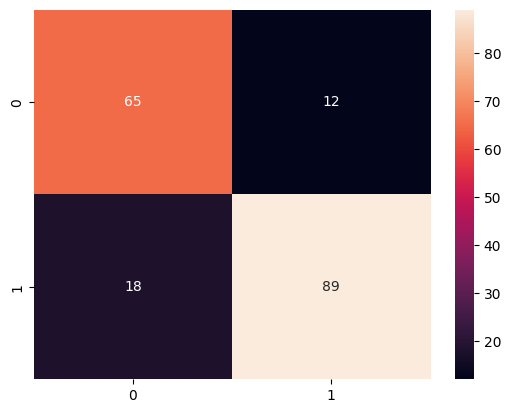

In [61]:
sns.heatmap(cm, annot=True)
plt.show()

In [62]:
precision_score(y_test, lr.predict(x_test))*100

88.11881188118812

In [63]:
recall_score(y_test, lr.predict(x_test))*100

83.17757009345794

In [64]:
f1_score(y_test, lr.predict(x_test))*100

85.57692307692307

# svm

In [65]:
from sklearn.svm import SVC

In [66]:
sv = SVC(kernel='rbf')

In [67]:
sv.fit(x_train, y_train)

SVC()

In [68]:
sv.score(x_test, y_test)*100

86.41304347826086

In [69]:
sv1 = cross_val_score(sv, x, y, cv=KFold(n_splits=10))

In [70]:
sv1.mean()*100

86.36645962732918

In [71]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [72]:
cm = confusion_matrix(y_test, sv.predict(x_test))
cm

array([[65, 12],
       [13, 94]], dtype=int64)

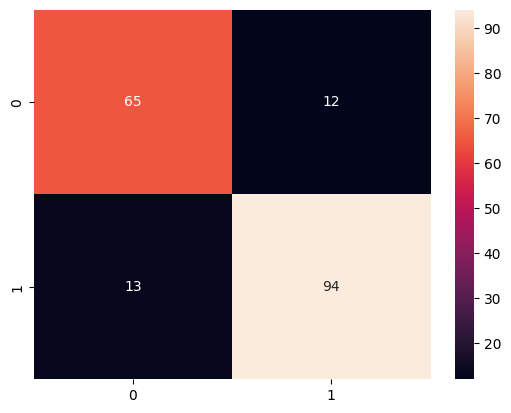

In [73]:
sns.heatmap(cm, annot=True)
plt.show()

In [74]:
precision_score(y_test, sv.predict(x_test))*100

88.67924528301887

In [75]:
recall_score(y_test, sv.predict(x_test))*100

87.85046728971963

In [76]:
f1_score(y_test, sv.predict(x_test))*100

88.26291079812206

# Decision Tree 

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [78]:
for i in range(1, 20):
    dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt1.fit(x_train, y_train)
    print(dt1.score(x_train, y_train),dt1.score(x_test, y_test))

0.8174386920980926 0.7989130434782609
0.8174386920980926 0.7989130434782609
0.8514986376021798 0.8097826086956522
0.8692098092643051 0.8586956521739131
0.888283378746594 0.8315217391304348
0.9209809264305178 0.8152173913043478
0.94141689373297 0.8152173913043478
0.9645776566757494 0.7880434782608695
0.9795640326975477 0.8260869565217391
0.9877384196185286 0.7934782608695652
0.9904632152588556 0.7989130434782609
0.997275204359673 0.7717391304347826
0.9986376021798365 0.782608695652174
1.0 0.7934782608695652
1.0 0.7934782608695652
1.0 0.7989130434782609
1.0 0.782608695652174
1.0 0.7989130434782609
1.0 0.7880434782608695


In [79]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [80]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
dt.score(x_test, y_test)*100

85.86956521739131

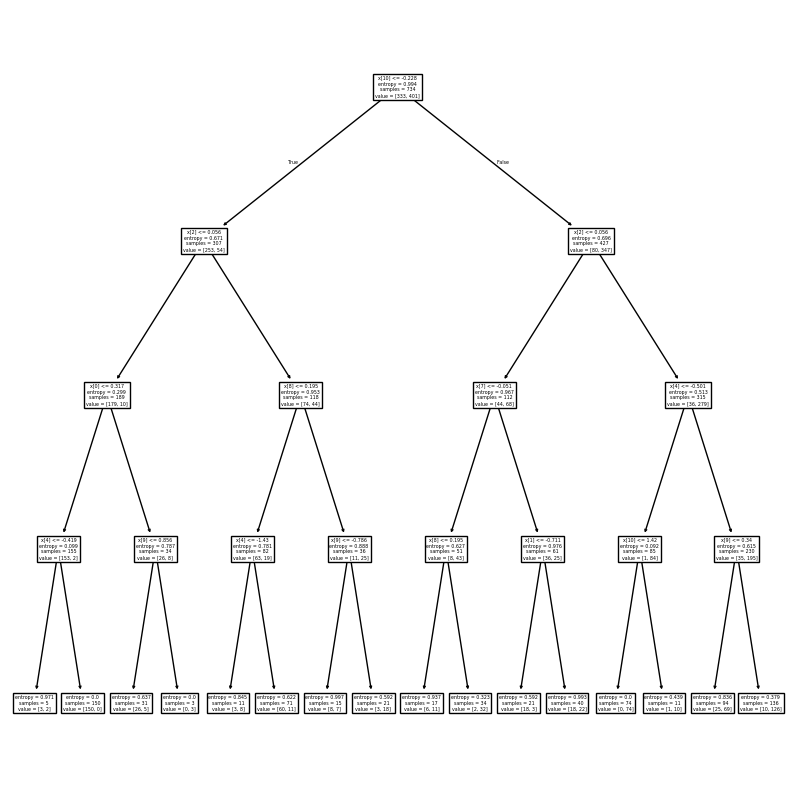

In [82]:
plt.figure(figsize=(10, 10))
plot_tree(dt)
plt.show()

In [83]:
dtc = cross_val_score(dt, x, y, cv=KFold(n_splits=10))

In [84]:
dtc.mean()*100

82.54777830864788

In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [86]:
cfm = confusion_matrix(y_test, dt.predict(x_test))
cfm

array([[63, 14],
       [12, 95]], dtype=int64)

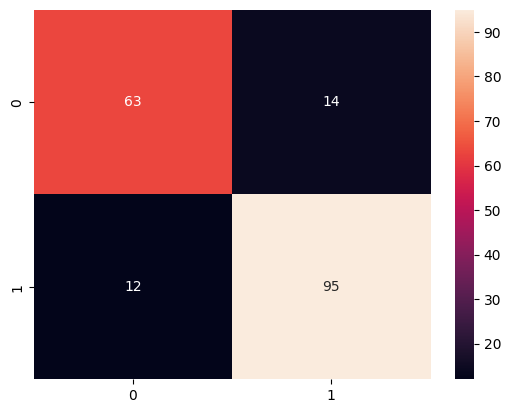

In [87]:
sns.heatmap(cfm, annot=True)
plt.show()

In [88]:
precision_score(y_test, dt.predict(x_test))*100

87.1559633027523

In [89]:
recall_score(y_test, dt.predict(x_test))*100

88.78504672897196

In [90]:
f1_score(y_test, dt.predict(x_test))*100

87.96296296296296

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [93]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
rf.score(x_test, y_test)*100

87.5

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
p = cross_val_score(rf, x, y, cv=KFold(n_splits=10))

In [97]:
p.mean()*100

86.47754419493549

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grids = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

In [100]:
gs = GridSearchCV(rf, param_grid=param_grids, cv=KFold(n_splits=10))

In [101]:
gs.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [102]:
gs.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

In [103]:
gs.best_score_*100

87.17697149204

In [104]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [105]:
cf = confusion_matrix(y_test, rf.predict(x_test))
cf

array([[66, 11],
       [12, 95]], dtype=int64)

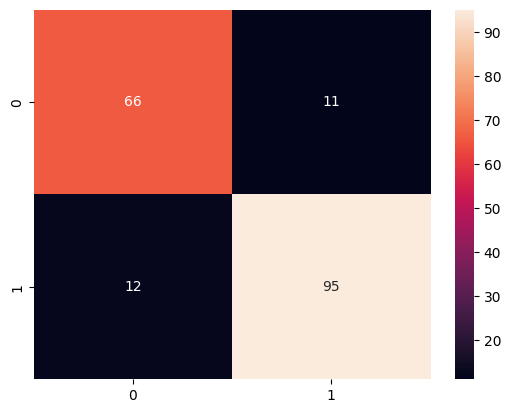

In [106]:
sns.heatmap(cf, annot=True)
plt.show()

In [107]:
precision_score(y_test, rf.predict(x_test))*100

89.62264150943396

In [108]:
recall_score(y_test, rf.predict(x_test))*100

88.78504672897196

In [109]:
f1_score(y_test, rf.predict(x_test))*100

89.2018779342723